# 1)
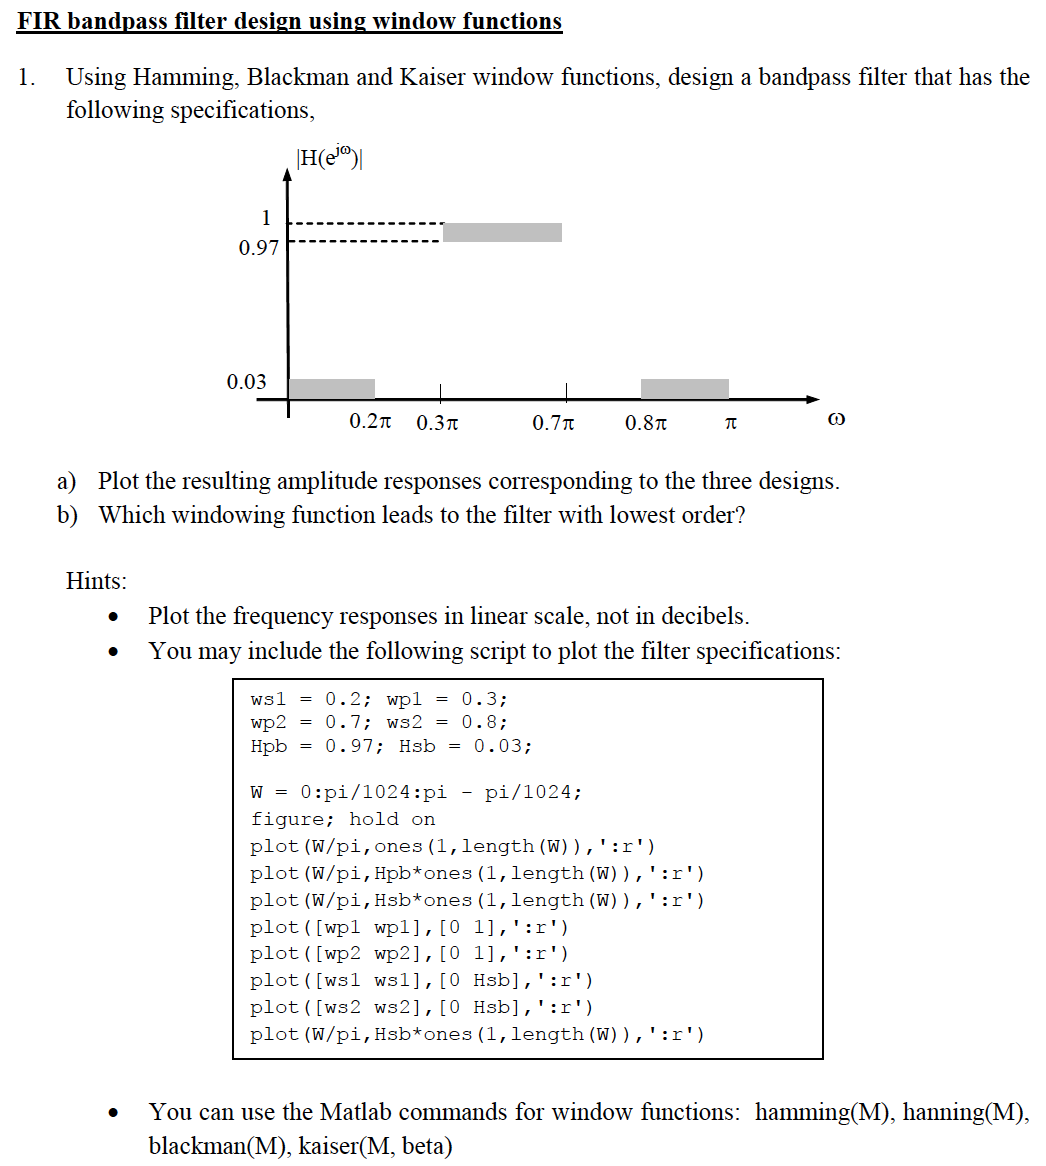

## a)

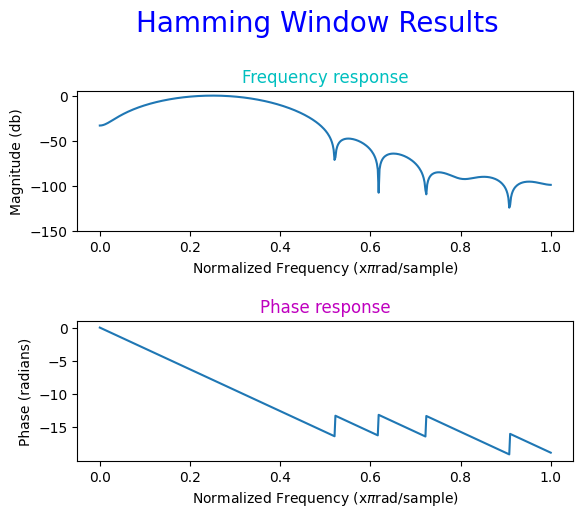

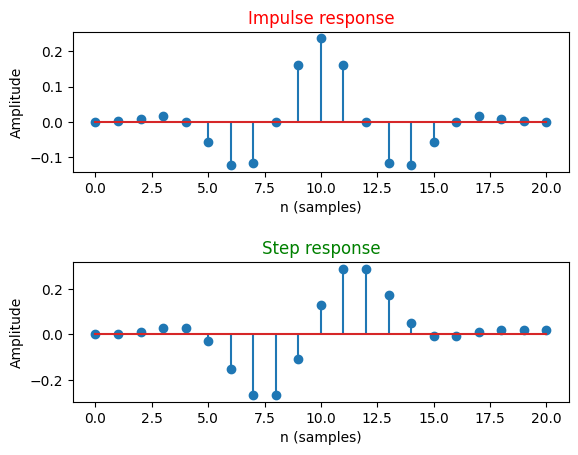

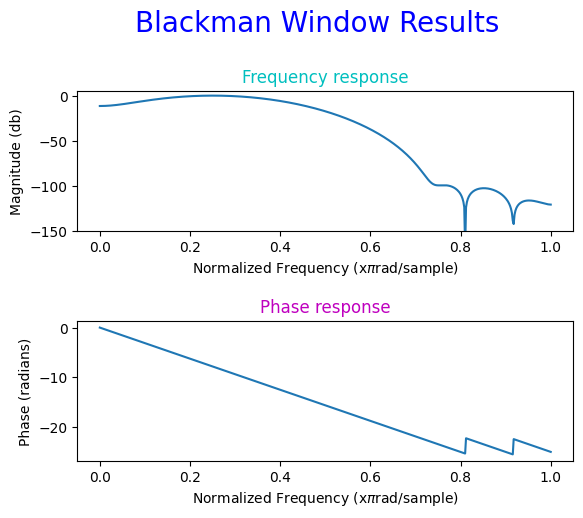

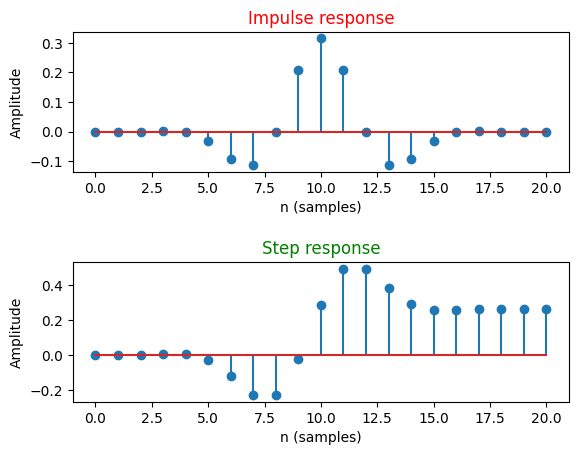

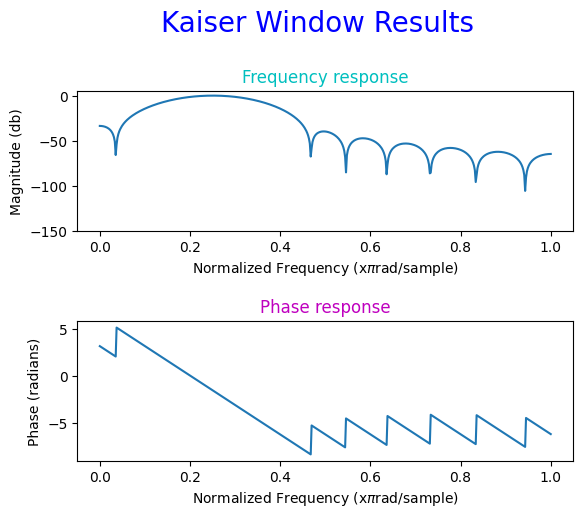

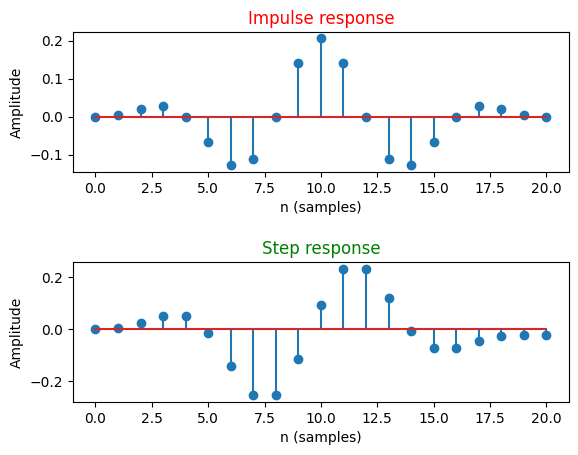

In [ ]:
#https://github.com/mpastell/Pweave/blob/master/doc/examples/FIR_design.py
from __future__ import division
import numpy as np
from pylab import *
import scipy.signal as signal

#Plot frequency and phase response
def mfreqz(b,a=1,window=str):
    w,h = signal.freqz(b,a)
    h_dB = 20 * log10 (abs(h))
    suptitle(window,color='b', fontsize=20, y=1.05)
    subplot(211)
    plot(w/max(w),h_dB)
    ylim(-150, 5)
    ylabel('Magnitude (db)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')

    title(r'Frequency response',color='c' )
    subplot(212)
    h_Phase = unwrap(arctan2(imag(h),real(h)))
    plot(w/max(w),h_Phase)
    ylabel('Phase (radians)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Phase response',color='m')
    subplots_adjust(hspace=0.65)

#Plot step and impulse response
def impz(b,a=1,window=str):
    l = len(b)
    impulse = repeat(0.,l); impulse[0] =1.
    x = arange(0,l)
    response = signal.lfilter(b,a,impulse)
    subplot(211)
    stem(x, response)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Impulse response',color='r')
    subplot(212)
    step = cumsum(response)
    stem(x, step)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Step response',color='g')
    subplots_adjust(hspace=0.65)


#"Bandpass FIR filter."
wc=0.125 #cutoff
n = 21 # window lenght

a = signal.firwin(n, cutoff = [0.15, 0.35], window = 'hamming', pass_zero = False)
mfreqz(a,window='Hamming Window Results')
show()
#Impulse and step response
figure(2)
impz(a)
show()
#############################
a = signal.firwin(n, cutoff = [0.15, 0.35], window = 'blackmanharris', pass_zero = False)
mfreqz(a,window='Blackman Window Results')
show()
#Impulse and step response
figure(2)
impz(a)
show()
#############################
# b chosen based on below link formula
#https://tomroelandts.com/articles/how-to-create-a-configurable-filter-using-a-kaiser-window


b = 0.1    # Transition band, as a fraction of the sampling rate (in (0, 0.5)).
A = 36.4781    # Attenuation in the stopband [dB].

N = int(np.ceil((A - 8) / (2.285 * 2 * np.pi * b))) + 1
if not N % 2: N += 1  # Make sure that N is odd.
if A > 50:
    beta = 0.1102 * (A - 8.7)
elif A <= 50 and A >= 21:
    beta = 0.5842 * (A - 21) ** 0.4 + 0.07886 * (A - 21)
else:
    beta = 0


a = signal.firwin(n, cutoff = [0.15, 0.35], window = ('kaiser', beta), pass_zero = False)
mfreqz(a,window='Kaiser Window Results')
show()
#Impulse and step response
figure(2)
impz(a)
show()


## b)

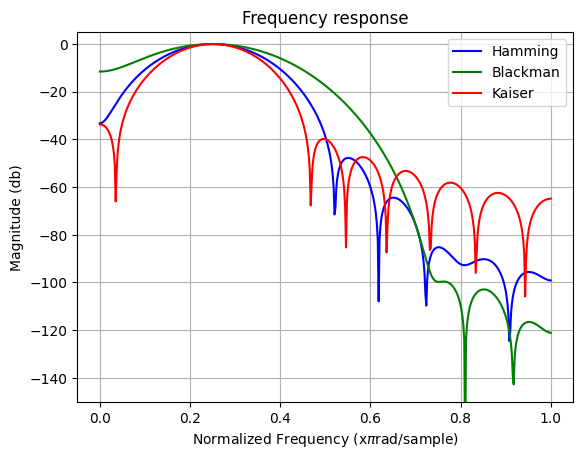

In [ ]:



#"Bandpass FIR filter."
wc=0.125 #cutoff frequency
n = 21 # window lenght

b1 = signal.firwin(n, cutoff = [0.15, 0.35], window = 'hamming', pass_zero = False)

#############################
b2 = signal.firwin(n, cutoff = [0.15, 0.35], window = 'blackmanharris', pass_zero = False)


#############################
# b chosen based on below link formula
#https://tomroelandts.com/articles/how-to-create-a-configurable-filter-using-a-kaiser-window


a = 1.0    # Transition band, as a fraction of the sampling rate (in (0, 0.5)).
A = 36.4781    # Attenuation in the stopband [dB].

N = int(np.ceil((A - 8) / (2.285 * 2 * np.pi * b))) + 1
if not N % 2: N += 1  # Make sure that N is odd.
if A > 50:
    beta = 0.1102 * (A - 8.7)
elif A <= 50 and A >= 21:
    beta = 0.5842 * (A - 21) ** 0.4 + 0.07886 * (A - 21)
else:
    beta = 0


b3 = signal.firwin(n, cutoff = [0.15, 0.35], window = ('kaiser', beta), pass_zero = False)



w1,h1 = signal.freqz(b1,a)
w2,h2 = signal.freqz(b2,a)
w3,h3 = signal.freqz(b3,a)


h1_dB = 20 * log10 (abs(h1))
h2_dB = 20 * log10 (abs(h2))
h3_dB = 20 * log10 (abs(h3))

plot(w1/max(w1),h1_dB,label='Hamming',color='b')
plot(w2/max(w2),h2_dB,label='Blackman',color='g')
plot(w3/max(w3),h3_dB,label='Kaiser',color='red')
grid()
ylim(-150, 5)
ylabel('Magnitude (db)')
xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
legend(loc=0);
title(r'Frequency response' )
show()


# 2)
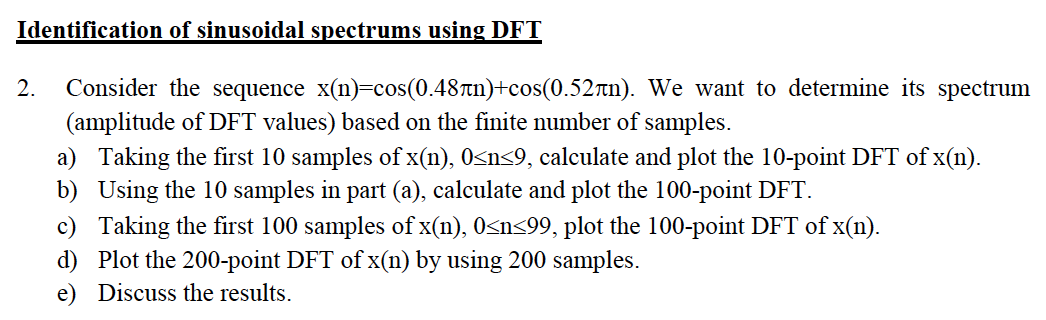

### Generate Audio of Sin Waves and Play

In [ ]:
#!pip install sounddevice
#!pip install playsound
#!pip install pyalsaaudio
#!pip install wavio
#!pip install simpleaudio

In [ ]:
import numpy as np
import simpleaudio as sa
import wavio
import soundfile as sf



frequency = 440  # Our played note will be 440 Hz
fs = 44100  # 44100 samples per second
seconds = 3  # Note duration of 3 seconds

# Generate array with seconds*sample_rate steps, ranging between 0 and seconds
t = np.linspace(0, seconds, seconds * fs, False)

# Generate a 440 Hz sine wave
note = np.sin(frequency * t * 2 * np.pi)

# Ensure that highest value is in 16-bit range
audio = note * (2**15 - 1) / np.max(np.abs(note))
# Convert to 16-bit data
audio = audio.astype(np.int16)


#Save numpyarray audio file
wavio.write("myfile2.wav", audio, fs, sampwidth=2)


# Extract audio data and sampling rate from file
#data, fs = sf.read('myfile.wav')

#PLAY Audio
#https://stackoverflow.com/questions/70659433/portaudioerror-error-querying-device-1-in-google-colab-when-using-the-sounddev
from IPython.display import Audio
from IPython.display import display

def beep():
    wn = Audio("myfile2.wav", autoplay=True)
    display(wn)
beep()






### Method 2 for Playing Stereo Generated Sin Waves

In [ ]:
#https://ipython.org/ipython-doc/3/api/generated/IPython.display.html
# Generate a sound
import numpy as np
framerate = 44100
t = np.linspace(0,5,framerate*5)
data = np.sin((2*np.pi*220*t) + np.sin(2*np.pi*224*t))
Audio(data,rate=framerate)

# Can also do stereo or more channels
dataleft = np.sin(2*np.pi*220*t)
dataright = np.sin(2*np.pi*224*t)
Audio([dataleft, dataright],rate=framerate)

### Play Multiplie audio files with 5 Second delay

In [ ]:
    import IPython.display as ipd
    import time
    wavs = ['myfile.wav', 'myfile2.wav']
    for wav in wavs:
        ipd.display(ipd.Audio(wav, autoplay=True))
        time.sleep(5) # next autoplay starts in 5s

## a) 10-point DFT of x(n)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

<ipython-input-14-6e8d2447d05b>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


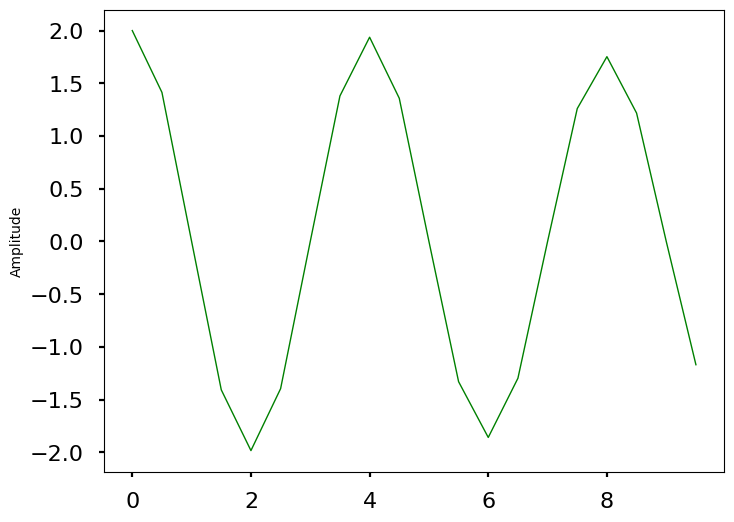

In [ ]:
#https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html
# Also # https://github.com/mohammadreza33/DFT-Discrete-Fourier-Transform-/blob/master/signalDFT.py

# sampling rate for a sinusoidal wave should be at lease 2 perseconds because of two curve of cos and sin
sr = 2
# sampling interval
ts = 1/sr
t = np.arange(0,10,ts)

freq = 0.24
x = 1*np.cos(2*np.pi*freq*t)

freq = 0.26
x += 1*np.cos(2*np.pi*freq*t)

#freq = 7
#x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'g',linewidth=1.0)
plt.ylabel('Amplitude', fontsize=10)
plt.show()

In [ ]:

def DFT(x):
    """
    Function to calculate the
    discrete Fourier Transform
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)

    X = np.dot(e, x)

    return X

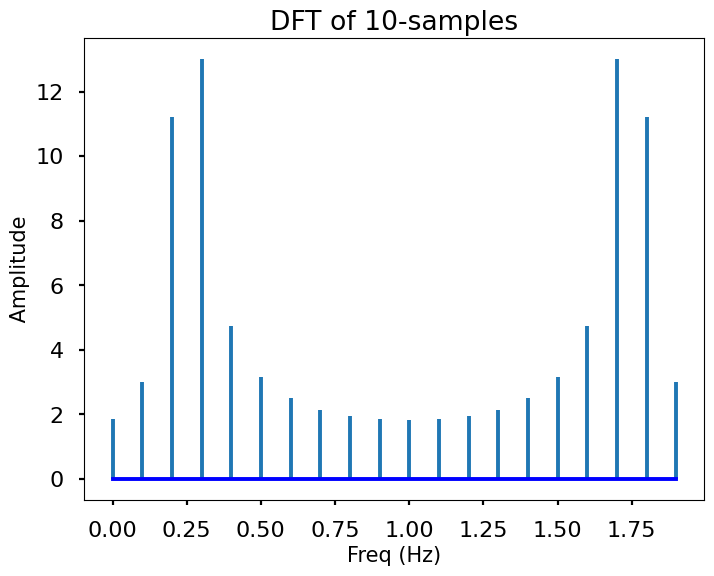

In [ ]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize = (8, 6))

plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b",linefmt='-')
plt.xlabel('Freq (Hz)', fontsize=15)
plt.ylabel(' Amplitude ', fontsize=15)
plt.title('DFT of 10-samples')
plt.show()

## b) Using the 10 samples in part (a), calculate and plot the 100-point DFT.

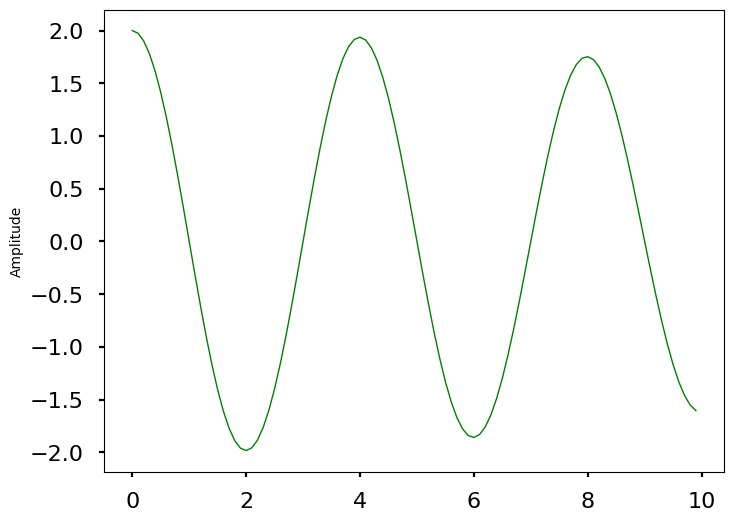

In [ ]:
#https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html

# sampling rate
sr = 10
# sampling interval
ts = 1.0/sr
t = np.arange(0,10,ts)

freq = 0.24
x = 1*np.cos(2*np.pi*freq*t)

freq = 0.26
x += 1*np.cos(2*np.pi*freq*t)

#freq = 7
#x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'g',linewidth=1.0)
plt.ylabel('Amplitude', fontsize=10)
plt.show()

In [ ]:


def DFT(x):
    """
    Function to calculate the
    discrete Fourier Transform
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)

    X = np.dot(e, x)

    return X

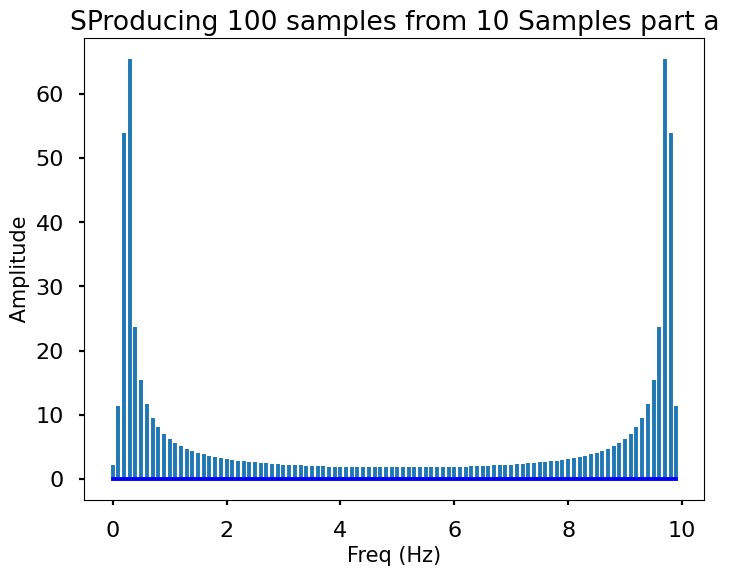

In [ ]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="-b",linefmt='-')
plt.xlabel('Freq (Hz)', fontsize=15)
plt.ylabel(' Amplitude ', fontsize=15)
plt.title('Producing 100 samples from 10 Samples')

plt.show()

## c) 100-point DFT of x(n).

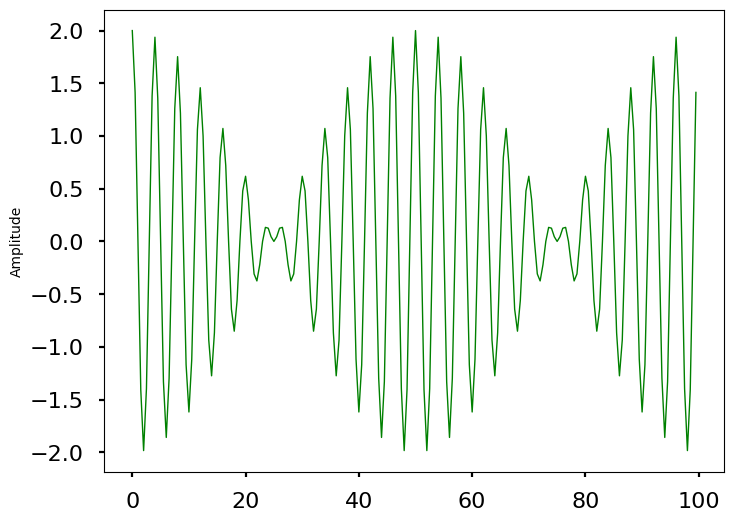

In [ ]:
#https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html

# sampling rate
sr = 2
# sampling interval
ts = 1/sr
t = np.arange(0,100,ts)

freq = 0.24
x = 1*np.cos(2*np.pi*freq*t)

freq = 0.26
x += 1*np.cos(2*np.pi*freq*t)

#freq = 7
#x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'g',linewidth=1.0)
plt.ylabel('Amplitude', fontsize=10)
plt.show()

In [ ]:

def DFT(x):
    """
    Function to calculate the
    discrete Fourier Transform
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)

    X = np.dot(e, x)

    return X

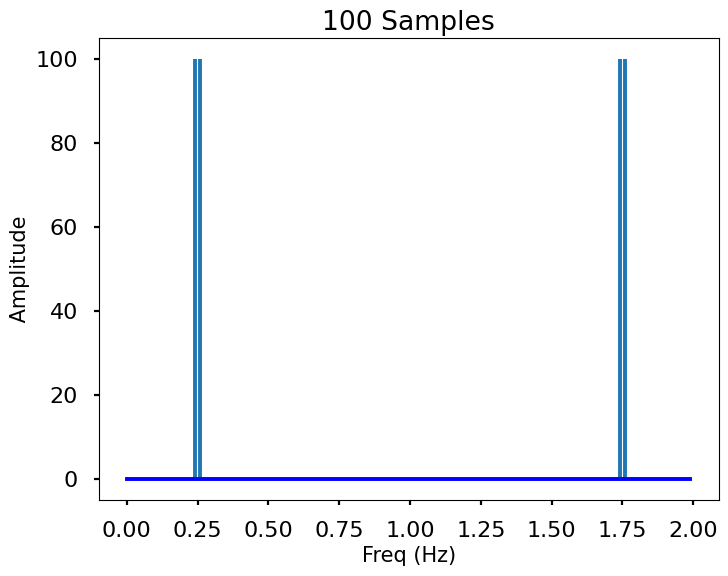

In [ ]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="-b",linefmt='-')
plt.xlabel('Freq (Hz)', fontsize=15)
plt.ylabel(' Amplitude ', fontsize=15)
plt.title('100 Samples')

plt.show()

## d) 200-point DFT of x(n).

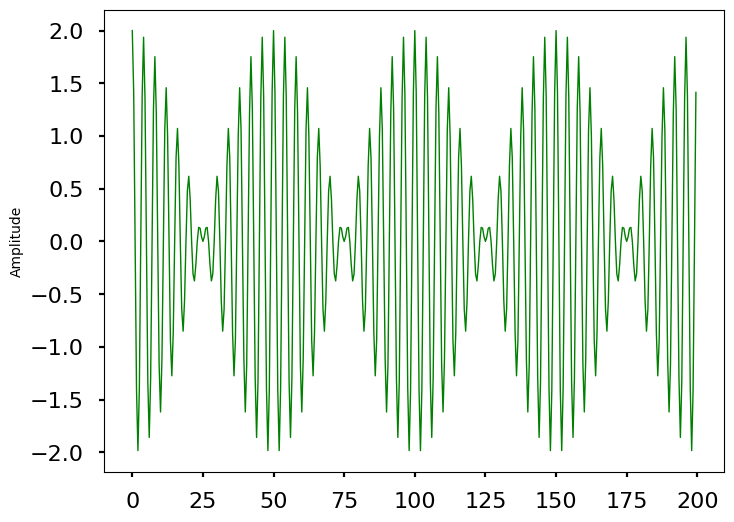

In [ ]:
#https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html

# sampling rate
sr = 2
# sampling interval
ts = 1/sr
t = np.arange(0,200,ts)

freq = 0.24
x = 1*np.cos(2*np.pi*freq*t)

freq = 0.26
x += 1*np.cos(2*np.pi*freq*t)

#freq = 7
#x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'g',linewidth=1.0)
plt.ylabel('Amplitude', fontsize=10)
plt.show()

In [ ]:

def DFT(x):
    """
    Function to calculate the
    discrete Fourier Transform
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)

    X = np.dot(e, x)

    return X

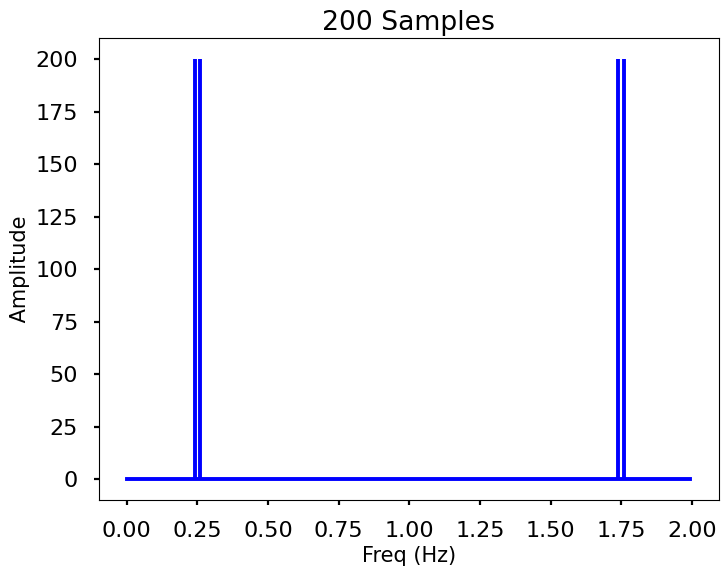

In [ ]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)', fontsize=15)
plt.ylabel(' Amplitude ', fontsize=15)
plt.title('200 Samples')

plt.show()